### Final Project Notebook: Amazon Rainforest wildfires and deforestation analysis

 <img src="https://cnr.ncsu.edu/news/wp-content/uploads/sites/10/2021/11/11182021-amazon-deforestation-istock-facebook.jpg" alt="amazon" width="650" height="250"> 

### TABLE OF CONTENTS

- [__1. Motivation__](#1.)
- [__2. Basic Stats__](#2.)
- [__3. Data Analysis__](#3.)
- [__4. Genre__](#4.)
- [__5. Visualizations__](#5.)
- [__6. Discussion__](#6.)
- [__7. Contribution__](#7.)

<a id='1.'></a>
#### 1. Motivation

*What is your dataset?*

The datasets that will be used for this project can be categorized in three different topics. The first dataset is about deforastation and wildfires from 2004 to 2019 and 1999 to 2019 respectively. The deforestation describes the deforested area in $km^2$ per year for each different state. The wildfires describes the exact number of fires outbreaks in the Brazil by state, month and year, from 1999 to 2019, the data was gathered by detecting fire outbreaks through satellite images, updated every 3 hours. 

The second dataset about animal ni puta idea melinaaaaaaaaaaaa. 

The last dataset is about harvest area, production of maize, soybeans, sorghum, wheat, fava beans, beans, oats, rye, barley and pea from each region in Brazil since 1974, In addition, we found a dataset which describe the amount of production of crops globally so we can compare brazil will different countries and continents.
**States of Brazil: The dataset contains state all over Brazil, however not all of them are close to Amazon rainforest so we cannot assume that the agriculture actions are related to deforestation. We will only use the following states:**

   * RR - State of Roraima
   * AP - State of Amapá
   * AM - State of Amazonas
   * AC - State of Acre 
   * RO - State of Rondônia
   * PA - State of Pará

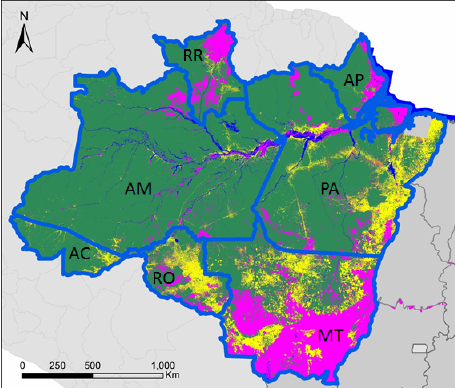
<div align="center">
    <h5>Brazil states arround Amazon rainforest</h5>
</div>


*Why did you choose this/these particular dataset(s)?*

The idea was to approach the topic of wildfires and deforestation from different point of views, since wildfires might be naturally-caused (e.g. lightning). The specific datasets that we found contain information not only about fires and deforestation but also agricutlure development such as harvested area over the last years and animals and plants that they see their natural environment get destroyed. Brazil is a major agricultural and industrial power, as well as Latin America's and the Caribbean's most powerful economy. It is the world's fourth-largest agricultural producer, producing the most coffee, sugarcane, and citrus, as well as the second-largest soybean, beef, and poultry producers.

*What was your goal for the end user's experience?*

Our main goal is to try to analyse the amount of the fire outbreaks in the Amazon rainforest and what is the impact in terms of deforestation. Furthmore, overpopulation increases the demand for more landfields in order to cover people's food needs, thus we will try to find if the fire outbreaks and deforestation are related to the increase of the crop area in Brazil. Lastly, rainforests are home to a large number of the world's plant and animals species, including many endangered species....



In [3]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections as coll
import re

In [4]:
# load all datasets\

# wildfires + deforestation

# animals + plants

# crops
harvest_data = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/socialDataAndViz/master/data/harvested_area.csv")
all_crops = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/socialDataAndViz/master/data/all_crops_needed.csv", encoding='cp1252')
forest = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/socialDataAndViz/master/data/annual-change-forest-area.csv")

<a id='2.'></a>
#### 2. Basic stats

*Write about your choices in data cleaning and preprocessing.*

*Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.*


##### 2.3 Crops

In [6]:
# check if NaN values
print("NaN values", harvest_data.columns[harvest_data.isna().any()])

print("Number of different grains: ", len(list(harvest_data.Grain.unique())))

NaN values Index([], dtype='object')
Number of different grains:  10


In [7]:
states = ["(RR)", "(AP)", "(AM)", "(AC)", "(RO)", "(PA)"]
columns =  list(harvest_data.columns)
columns_to_keep  = ["Grain", "Year"]
states_to_keep = []

In [8]:
# keep only columns with related states in brazil
for item in columns:
    for state in states:
        if state in item:
            columns_to_keep.append(item)
            states_to_keep.append(item)

In [9]:
# check if duplicates
print("Duplicates: ", [item for item, count in coll.Counter(columns_to_keep).items() if count > 1])
print("Number of columns to keep:", len(columns_to_keep))

# only keep columns that are belongs to the specific regions mentioned above
# total number of rows should be 312 from 5565

related_harvest_data = harvest_data.filter(columns_to_keep, axis=1)
related_harvest_data.sort_values("Year", ascending=True).head(10)

Duplicates:  []
Number of columns to keep: 312


,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),...,Itaubal (AP),Laranjal do Jari (AP),Macapá (AP),Mazagão (AP),Oiapoque (AP),Porto Grande (AP),Pracuúba (AP),Santana (AP),Tartarugalzinho (AP),Vitória do Jari (AP)
0,Sorghum,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Wheat,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,Pea,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,Barley,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Maize,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,600.0,250.0,15.0,0.0,0.0,0.0,0.0,0.0
93,Soybeans,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,Rye,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,Oats,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,Fava Beans,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,Beans,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# keep only relevant states
states_to_keep
init_state = []

for item in states_to_keep:
    state = re.search(r'\((.*?)\)',item).group(1)
    if state in init_state:
        continue
    init_state.append(state)
print("States to keep:", init_state)

States to keep: ['RO', 'AC', 'AM', 'RR', 'PA', 'AP']


In [11]:
# rename columns to keep only state
def renaming_fun(c_name):
    for item in init_state:
        if item in c_name:
            return item

In [12]:
count_states = []
for city in list(related_harvest_data.columns):
    state_to_add = renaming_fun(city)
    if state_to_add:
        count_states.append(state_to_add) 

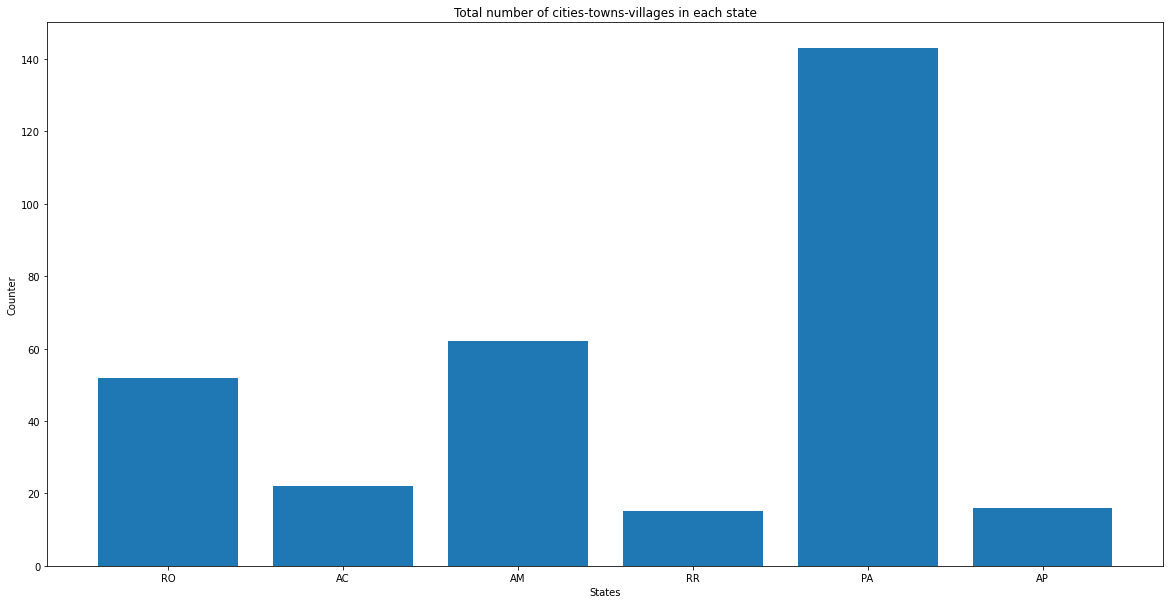

In [14]:
# find how many cities-towns-villages belongs to each state
states_counter = dict(coll.Counter(count_states))
keys = states_counter.keys()
values = states_counter.values()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.bar(keys, values)
plt.xlabel("States")
plt.ylabel("Counter")
plt.title("Total number of cities-towns-villages in each state")
plt.show()

In [15]:
related_harvest_data["Harv_sum"] = related_harvest_data[states_to_keep].sum(axis=1)
grouped_per_year = related_harvest_data.groupby(by=["Year"]).sum().reset_index()

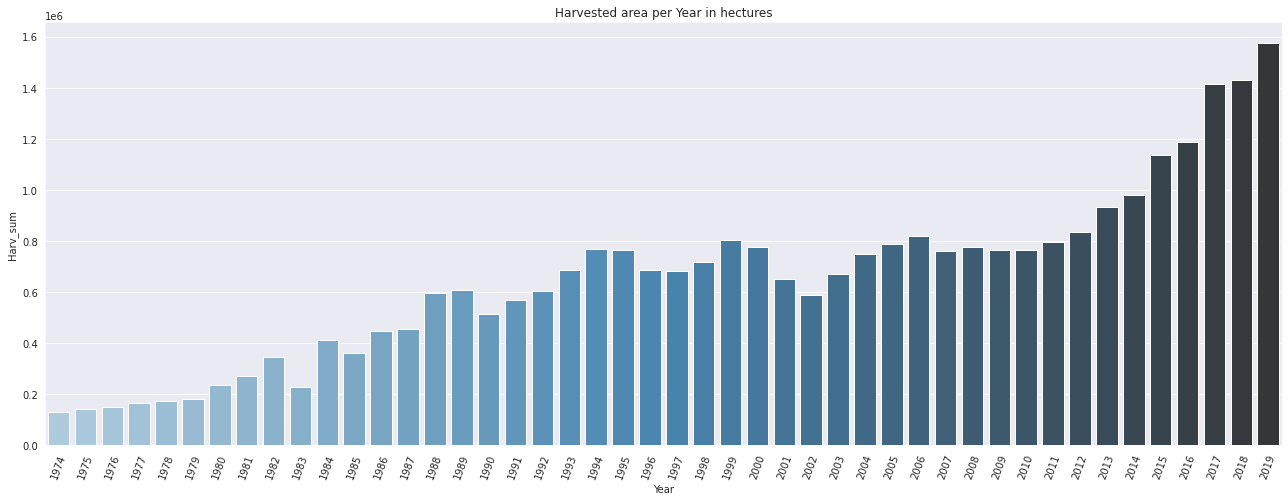

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax = sns.barplot(x="Year", y="Harv_sum", data=grouped_per_year, palette="Blues_d")
sns.set_style("darkgrid")
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("Harvested area per Year in hectures")
plt.show()

In [19]:
# group the harvest for each type and only 
# obtain from 2000 if the harv sum is not 0
grouped_grain = related_harvest_data
grouped_grain = grouped_grain.groupby(by=["Grain", "Year"], as_index=False).sum()
grouped_grain = grouped_grain.loc[~((grouped_grain['Harv_sum'] == 0))]
grouped_grain = grouped_grain[grouped_grain['Year'] >= 2000]  
grouped_grain

,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),...,Laranjal do Jari (AP),Macapá (AP),Mazagão (AP),Oiapoque (AP),Porto Grande (AP),Pracuúba (AP),Santana (AP),Tartarugalzinho (AP),Vitória do Jari (AP),Harv_sum
72,Beans,2000,10626.0,290.0,1080.0,5651.0,500.0,500.0,1000.0,202.0,...,45.0,30.0,15.0,5.0,25.0,12.0,10.0,30.0,12.0,179880.0
73,Beans,2001,7438.0,260.0,324.0,2366.0,1000.0,350.0,200.0,200.0,...,80.0,20.0,20.0,5.0,60.0,15.0,10.0,610.0,20.0,161921.0
74,Beans,2002,9235.0,183.0,223.0,2100.0,575.0,355.0,190.0,138.0,...,60.0,40.0,20.0,8.0,50.0,15.0,8.0,580.0,20.0,147434.0
75,Beans,2003,10158.0,208.0,200.0,2310.0,150.0,300.0,209.0,100.0,...,80.0,30.0,15.0,20.0,60.0,12.0,5.0,230.0,18.0,157499.0
76,Beans,2004,11174.0,477.0,500.0,2541.0,300.0,450.0,300.0,479.0,...,120.0,60.0,35.0,30.0,70.0,20.0,10.0,200.0,30.0,160297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Soybeans,2015,350.0,2243.0,21050.0,250.0,27000.0,3000.0,39450.0,0.0,...,0.0,8121.0,0.0,0.0,0.0,0.0,0.0,501.0,0.0,605606.0
410,Soybeans,2016,500.0,2078.0,21657.0,556.0,26300.0,3000.0,39000.0,0.0,...,0.0,10386.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,718979.0
411,Soybeans,2017,450.0,3321.0,21309.0,570.0,28000.0,3250.0,39000.0,0.0,...,0.0,13230.0,0.0,0.0,0.0,0.0,0.0,1134.0,0.0,818240.0
412,Soybeans,2018,450.0,5600.0,24780.0,570.0,32600.0,3250.0,39000.0,0.0,...,0.0,8305.0,0.0,0.0,0.0,0.0,0.0,6470.0,0.0,914876.0


In [21]:
group_to_line = grouped_grain.groupby(by=["Year"]).sum().reset_index()
group_to_line = group_to_line[group_to_line['Year'] >= 2000]  
group_to_line.set_index('Year', inplace=True)
group_to_line = group_to_line.rename(columns=renaming_fun)
grouped_states_line = group_to_line.groupby(group_to_line.columns, axis=1).sum()

In [25]:
# we can see that PA is the max grouped region for harvested area
# we can compare different cities for this state

pa_columns =  ["Year", "Grain"]

for item in list(grouped_grain.columns):
    if "PA" in item:
        pa_columns.append(item)

only_pa = grouped_grain[pa_columns]

only_pa = only_pa.groupby("Year").sum().reset_index()
only_pa

,Year,Abaetetuba (PA),Abel Figueiredo (PA),Acará (PA),Afuá (PA),Água Azul do Norte (PA),Alenquer (PA),Almeirim (PA),Altamira (PA),Anajás (PA),...,Tracuateua (PA),Trairão (PA),Tucumã (PA),Tucuruí (PA),Ulianópolis (PA),Uruará (PA),Vigia (PA),Viseu (PA),Vitória do Xingu (PA),Xinguara (PA)
0,2000,170.0,540.0,1000.0,400.0,3621.0,5570.0,305.0,10030.0,55.0,...,2650.0,2400.0,2079.0,550.0,5050.0,3995.0,45.0,2250.0,3600.0,3116.0
1,2001,70.0,650.0,1015.0,420.0,1945.0,6784.0,250.0,8550.0,68.0,...,3540.0,2200.0,791.0,500.0,5491.0,3050.0,180.0,2300.0,3880.0,1422.0
2,2002,70.0,905.0,250.0,400.0,1430.0,7305.0,40.0,8408.0,78.0,...,3650.0,2250.0,160.0,450.0,6940.0,3670.0,120.0,2800.0,2020.0,2667.0
3,2003,90.0,915.0,290.0,380.0,1444.0,4805.0,40.0,8480.0,80.0,...,4556.0,2700.0,1041.0,510.0,11264.0,3525.0,90.0,3000.0,1775.0,2583.0
4,2004,90.0,1020.0,450.0,0.0,1487.0,5575.0,45.0,8350.0,75.0,...,4915.0,2870.0,527.0,570.0,15843.0,3880.0,350.0,2750.0,1401.0,2140.0
5,2005,100.0,1300.0,500.0,0.0,1860.0,5900.0,124.0,7460.0,75.0,...,4400.0,3240.0,518.0,1080.0,13473.0,4350.0,350.0,2280.0,1003.0,1082.0
6,2006,200.0,1550.0,450.0,0.0,2200.0,5750.0,124.0,7160.0,95.0,...,4430.0,3530.0,506.0,1280.0,13728.0,2230.0,325.0,2800.0,990.0,1996.0
7,2007,400.0,1370.0,700.0,11.0,2225.0,5050.0,279.0,5430.0,95.0,...,4530.0,3530.0,621.0,1280.0,10743.0,2755.0,325.0,1910.0,346.0,1996.0
8,2008,100.0,925.0,400.0,0.0,1483.0,5250.0,279.0,3330.0,95.0,...,4250.0,3480.0,757.0,1700.0,16010.0,2825.0,175.0,2060.0,510.0,2495.0
9,2009,100.0,835.0,400.0,0.0,1769.0,4650.0,279.0,3090.0,95.0,...,3000.0,3480.0,704.0,1700.0,13865.0,2290.0,175.0,2150.0,510.0,1880.0


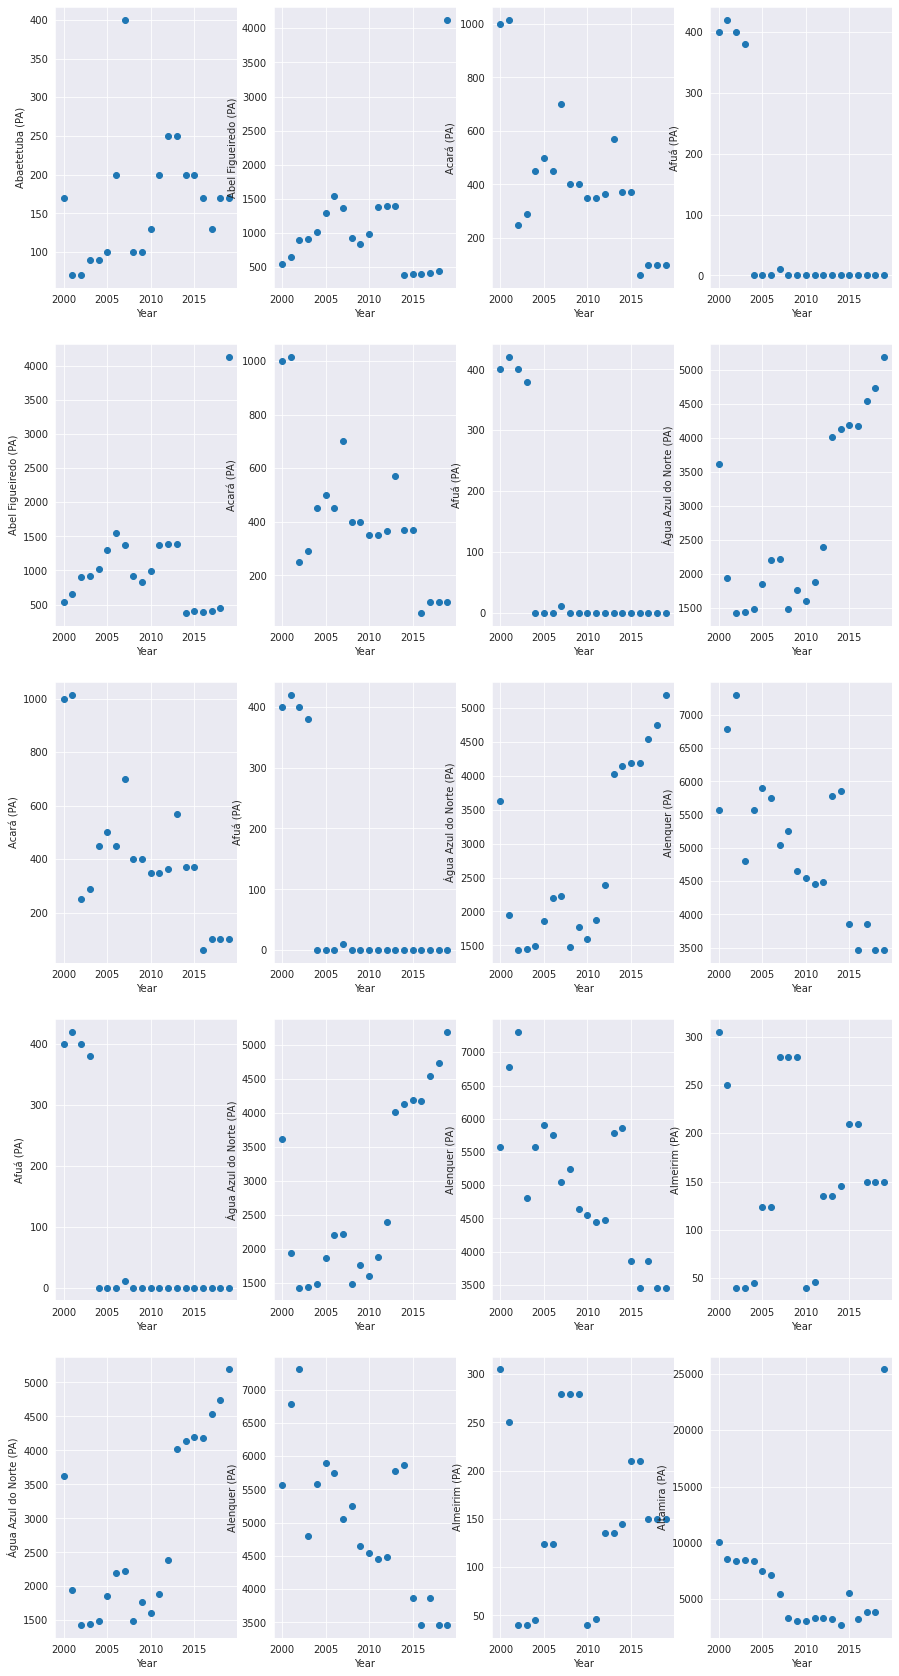

In [24]:
fig, ax = plt.subplots(5, 4, figsize=(15,30))

columns = list(only_pa.columns)
columns.remove("Year")

for i in range(5):
    for j in range(4):
        ax[i][j].scatter(x=only_pa.Year, y=only_pa[columns[i+j]])
        ax[i][j].set_xlabel("Year")
        ax[i][j].set_ylabel(columns[i+j])

<a id='3.'></a>
#### 3. Data Analysis

*Describe your data analysis and explain what you've learned about the dataset. If relevant, talk about your machine-learning.*

##### 3.3 Crops

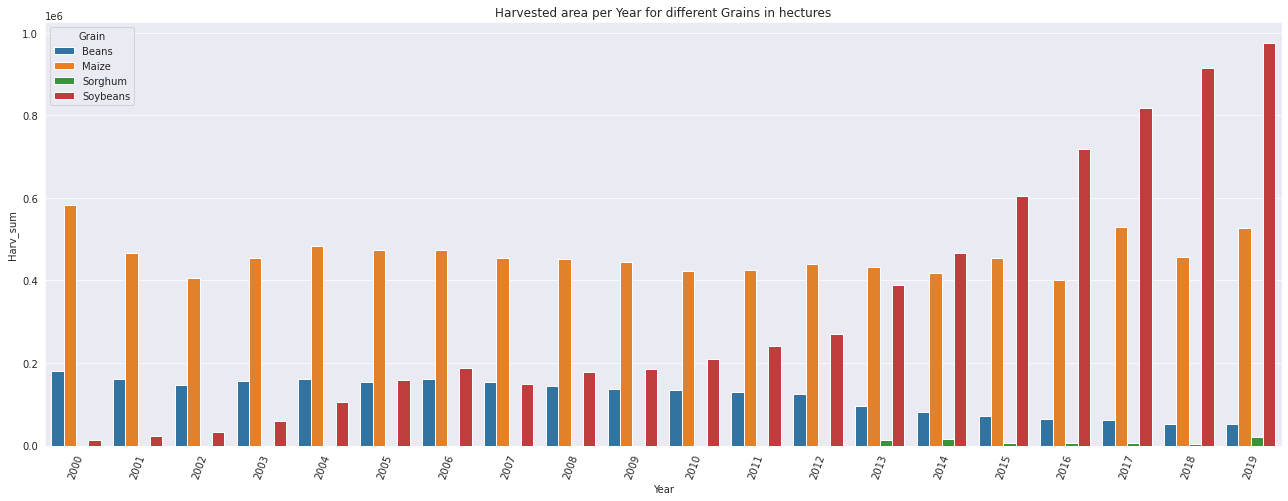

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax = sns.barplot(x="Year", y="Harv_sum", hue="Grain", data=grouped_grain)
plt.xticks(rotation=70)
sns.set_style("darkgrid")
plt.tight_layout()
plt.title("Harvested area per Year for different Grains in hectures")
plt.show()

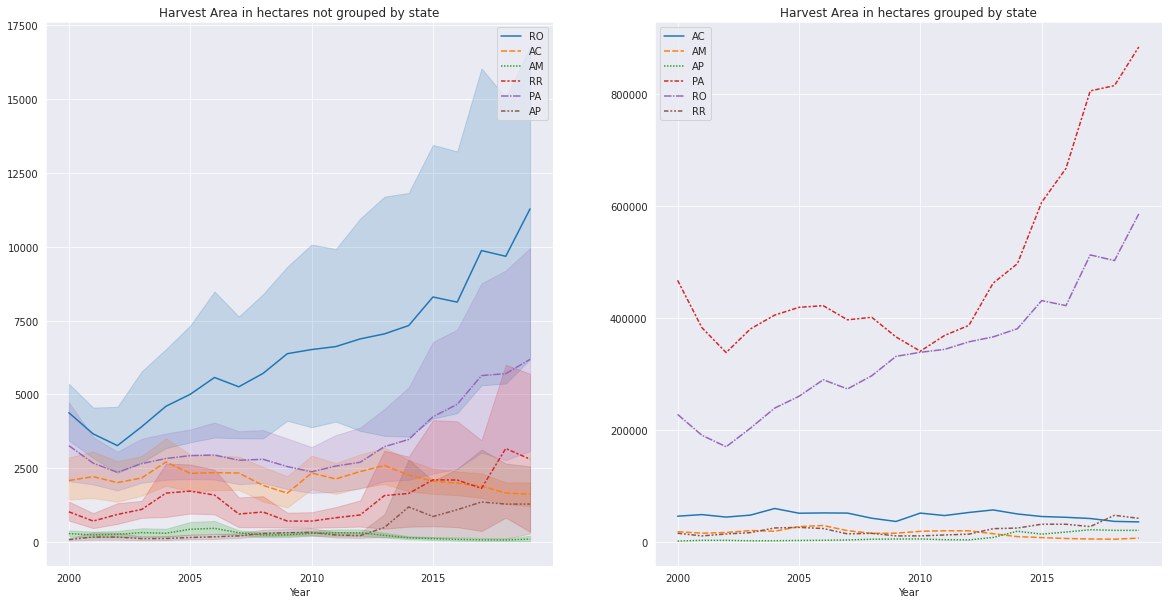

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1= sns.lineplot(data=group_to_line, ax=ax1)
ax2= sns.lineplot(data=grouped_states_line, ax=ax2)
ax1.locator_params(integer=True)
ax2.locator_params(integer=True)
sns.set_style("darkgrid")
ax1.set_title("Harvest Area in hectares not grouped by state")
ax2.set_title("Harvest Area in hectares grouped by state")
plt.show()

##### It can be noticed that the harvest area keeps expanding throught the years, with a peak in 2019 when the known amazon wildfire occured.

In [38]:
# places to compare
places = ['Americas', "Europe", "Asia", "Brazil", "Africa", "Argentina", "Peru"]
needed_crops = all_crops[all_crops["Area"].isin(places)]

In [39]:
# only data after 2010
global_produce = all_crops.loc[(all_crops.Element == 'Production')  & (all_crops.Year >2010)]

countries = all_crops.Area.unique()
area = []
amnt = []
for country in countries:
    temp = global_produce.loc[global_produce.Area == country]
    amount = temp.Value.sum()
    area.append(country)
    amnt.append(amount)
data_global = pd.DataFrame({'Country': area, 'Amount': amnt})
data_global = data_global.sort_values(by=['Amount'], ascending=False)

places = ['Americas', "Europe", "Asia", "Brazil", "Africa", "Argentina", "Peru"]
data_global = data_global[data_global["Country"].isin(places)]

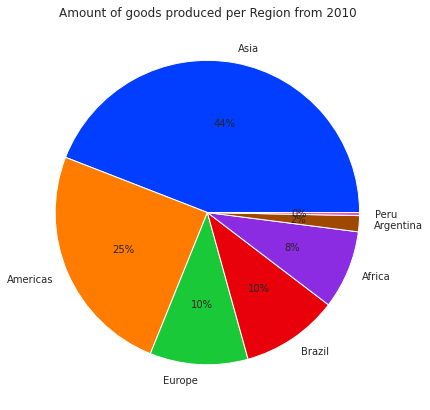

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
                                      
ax = plt.pie(data=data_global,x=data_global.Amount, labels = data_global.Country, colors=palette_color, autopct='%.0f%%')
plt.title("Amount of goods produced per Region from 2010")
plt.show()

<a id='4.'></a>
#### 4. Genre

*Which genre of data story did you use?*

*Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?*

*Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?*

<a id='5.'></a>
#### 5. Visualizations

*Explain the visualizations you've chosen.*


*Why are they right for the story you want to tell?*

<a id='6.'></a>
#### 6. Discussion

*What went well?*

*What is still missing? What could be improved? Why?*

<a id='7.'></a>
#### 7. Contribution

In [5]:
d = {'MELINA SISKOU' : ['', '', ':)', ':)', ':)', ':)', ':)', '', '', ''], 
     'ALEXANDRA POLYM' : ['', '', '', '', '', '', '', ':)', ':)', ':)'],
     'THOMAS SPYROU' : [':)', ':)', '', '', '', '', '', '', '', '']
     } 
  
# sections    
ct = pd.DataFrame(d, index=['2', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9']) 

ct
# POLYM A.K.A POLYMENOPOULOU s212558
# Melina Siskou s213158 
# Thomas Spyrou s213161

,MELINA SISKOU,ALEXANDRA POLYM,THOMAS SPYROU
2,,,:)
3.1,,,:)
3.2,:),,
3.3,:),,
3.4,:),,
3.5,:),,
3.6,:),,
3.7,,:),
3.8,,:),
3.9,,:),
